# WEEK 2 - 01.27.2025

# 1.Sharp Ratio
# 2.Measure of downside Risk

In [6]:
%load_ext autoreload 
%autoreload

In [10]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

import scipy.stats as scs 

In [12]:
returns = pd.read_csv("data2_Portfolios_Formed_on_ME_EW_monthly.csv",header=0, index_col=0, parse_dates=True, na_values=99.99)

C:\Users\wilfo\AppData\Local\Temp\ipykernel_21732\2905492096.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns = pd.read_csv("data2_Portfolios_Formed_on_ME_EW_monthly.csv",header=0, index_col=0, parse_dates=True, na_values=99.99)


In [14]:
returns.head(3)

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
192607,-99.99,-0.43,1.46,2.66,-0.57,0.37,1.71,1.49,3.27,-1.42,0.29,-0.15,0.88,1.48,1.94,1.54,1.44,3.06,3.48
192608,-99.99,3.74,3.03,2.09,3.60,3.64,3.67,1.56,2.35,4.61,2.59,4.03,3.24,2.50,4.85,1.54,1.57,1.18,3.52
192609,-99.99,-1.07,-0.48,0.01,-0.48,-1.55,0.03,-0.41,-0.15,0.91,-1.87,-2.27,-0.84,0.13,-0.08,-1.15,0.32,-1.00,0.68


In [16]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head(3)

,Lo 10,Hi 10
192607,-1.42,3.48
192608,4.61,3.52
192609,0.91,0.68


In [18]:
returns = returns/100
returns.columns = ['smallCap','LargeCap']
returns.head(3)

,smallCap,LargeCap
192607,-0.0142,0.0348
192608,0.0461,0.0352
192609,0.0091,0.0068


<Axes: >

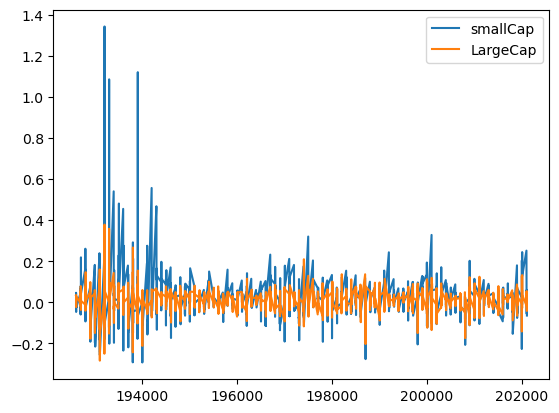

In [20]:
returns.plot()

In [22]:
annual_vol = returns.std() * np.sqrt(12)
annual_vol

smallCap    0.365563
LargeCap    0.186470
dtype: float64

In [24]:
returns.shape

(1145, 2)

In [26]:
n_months = returns.shape[0]
n_years = n_months/12
n_years

95.41666666666667

In [28]:
annual_ret = (1+returns).prod() ** (1/n_years) - 1
annual_ret

smallCap    0.172696
LargeCap    0.096613
dtype: float64

In [30]:
rf = 0.03
sharpe_ratio = (annual_ret- rf)/annual_vol
sharpe_ratio

smallCap    0.390345
LargeCap    0.357229
dtype: float64

In [32]:
scs.skew(returns)

array([4.32602503, 0.21217585])

In [34]:
scs.kurtosis (returns)

array([43.26219757,  7.52011156])

## MEASURE OF DOWNSIDE RISK

## 1. SEMI DEVIATION

In [36]:
returns.std()

smallCap    0.105529
LargeCap    0.053829
dtype: float64

In [119]:
returns[returns<0].std()

smallCap    0.051923
LargeCap    0.040267
dtype: float64

In [40]:
returns<0

,smallCap,LargeCap
192607,True,False
192608,False,False
192609,False,False
192610,True,True
192611,True,False
...,...,...
202107,True,False
202108,False,False
202109,True,True
202110,True,False


In [42]:
returns[returns<0].std()

smallCap    0.051923
LargeCap    0.040267
dtype: float64

## 2. VALUE AT RISK

In [45]:
np.percentile (returns[-240:],5,axis=0)

array([-0.089105, -0.07175 ])

In [47]:
z = scs.norm.ppf(0.05)
z

-1.6448536269514729

In [61]:
var_norm = -1 * (returns.mean() + z*returns.std())
var_norm

smallCap    0.155646
LargeCap    0.079383
dtype: float64

## 3. MAX DRAWDOWN

In [123]:
returns.index = returns.index.to_timestamp().to_period('M')
returns.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=1145)

<Axes: >

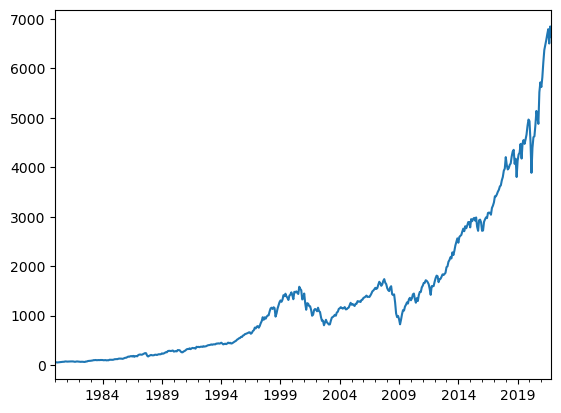

In [117]:
returns ['1980':]

wealth = (1 + returns['LargeCap']).cumprod()
wealth['1980':].plot()

<Axes: >

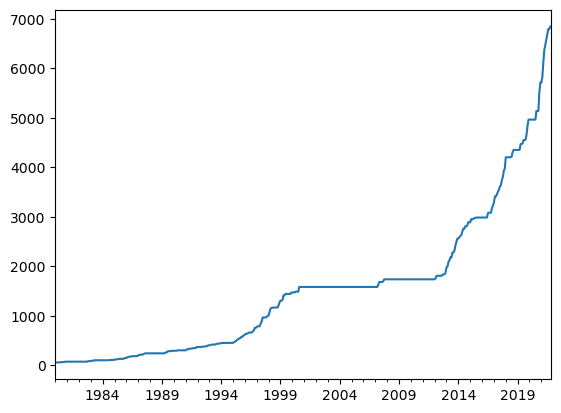

In [73]:
lastpeak = wealth.cummax()
lastpeak['1980':].plot()

<Axes: >

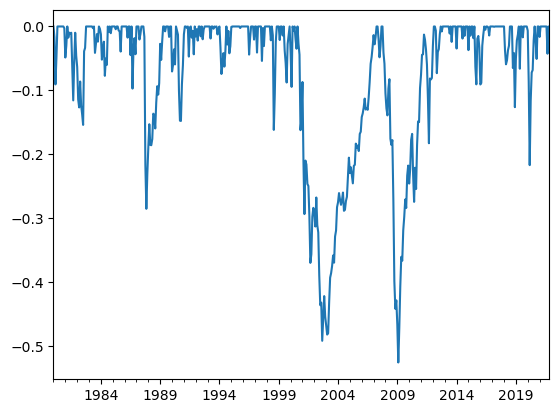

In [75]:
drawdown =(wealth - lastpeak)/lastpeak
drawdown['1980':].plot()